In [ ]:
#imports libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, mean_absolute_error,precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain.prompts import PromptTemplate

In [ ]:
#class
class Package:
  #Constructor
  def __init__(self,problem_statement="classification"):
    self.problem_statement=problem_statement

  def load_data(self, file_path):
        return pd.read_csv(file_path)

  def dataset_summary(self, data):
        return {
            "shape": data.shape,
            "columns": list(data.columns),
            "data_types": data.dtypes
        }

  #Return Models
  def return_models(self,problem_statement):
    pass


  #cleaning
  def clean_data(self,data):
    pass

  #Data Splitting
  def Data_splitting(self,data):
    pairwise_distances



  #preporcessing
  def Preprocess(self,data):
    pass


  #ML model Design
  def model_design(self,data):
    pass


  #LLM Service

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving raw_student_performance_dataset.csv to raw_student_performance_dataset (1).csv


In [ ]:
import pandas as pd
#class
class Package:
  #Constructor
  def _init_(self,problem_statement="classification"):
    self.problem_statement=problem_statement

  def load_data(self, file_path):
        return pd.read_csv(file_path)

  def dataset_summary(self, data):
        return {
            "shape": data.shape,
            "columns": list(data.columns),
            "data_types": data.dtypes
        }

  #Return Models
  def return_models(self,problem_statement):
    pass


  #cleaning
  def clean_data(self,data):
    pass

  #Data Splitting
  def Data_splitting(self,data):
    pairwise_distances



  #preporcessing
  def Preprocess(self,data):
    pass


  #ML model Design
  def model_design(self,data):
    pass


  #LLM Service

pkg = Package()

df = pkg.load_data("raw_student_performance_dataset (1).csv")

summary = pkg.dataset_summary(df)

print("Dataset Shape:", summary["shape"])
print("Columns:", summary["columns"])
print("Data Types:\n", summary["data_types"])

Dataset Shape: (100, 8)
Columns: ['student_id', 'age', 'gender', 'attendance_percentage', 'study_hours_per_day', 'internal_marks', 'final_exam_marks', 'result']
Data Types:
 student_id               float64
age                      float64
gender                    object
attendance_percentage    float64
study_hours_per_day      float64
internal_marks           float64
final_exam_marks         float64
result                    object
dtype: object


In [ ]:
df.isnull().sum()

,0
student_id,2
age,5
gender,7
attendance_percentage,3
study_hours_per_day,7
internal_marks,8
final_exam_marks,4
result,4


In [ ]:


print("Missing values BEFORE handling:")
print(df.isnull().sum())


Missing values BEFORE handling:
student_id               2
age                      5
gender                   7
attendance_percentage    3
study_hours_per_day      7
internal_marks           8
final_exam_marks         4
result                   4
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Numerical columns → mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['int64','float64']).columns] = \
    num_imputer.fit_transform(df.select_dtypes(include=['int64','float64']))

# Categorical columns → mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = \
    cat_imputer.fit_transform(df.select_dtypes(include=['object']))


In [ ]:
print("\nMissing values AFTER handling:")
print(df.isnull().sum())



Missing values AFTER handling:
student_id               0
age                      0
gender                   0
attendance_percentage    0
study_hours_per_day      0
internal_marks           0
final_exam_marks         0
result                   0
dtype: int64


In [ ]:
def handle_outliers(self, data):
    # Only target columns where outliers are likely to be "noise"
    # as per Team Lead's suggestion
    target_cols = ['study_hours_per_day']

    for col in target_cols:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

            print(f"Noise handled in: {col}")

    return data

In [ ]:
# View the statistical summary of your cleaned data
print("Data Summary After Outlier Capping:")
display(df.describe())


Data Summary After Outlier Capping:


,student_id,age,attendance_percentage,study_hours_per_day,internal_marks,final_exam_marks
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.642857,20.494737,79.134021,4.887097,66.826087,64.677083
std,28.362819,2.343586,12.526464,1.877793,17.924425,16.563618
min,1.000000,17.000000,60.500000,1.000000,37.000000,35.000000
25%,25.750000,18.000000,67.775000,3.600000,52.750000,52.750000
50%,49.642857,20.494737,81.350000,4.893548,66.826087,64.677083
75%,73.250000,22.250000,89.825000,6.600000,81.000000,77.250000
max,100.000000,24.000000,99.900000,7.900000,99.000000,99.000000


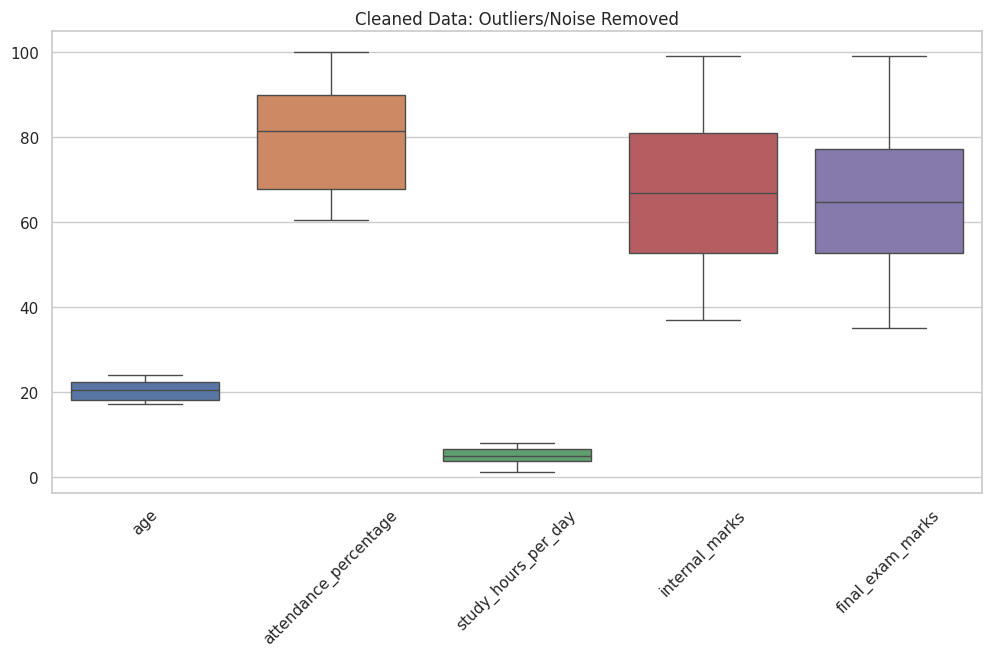

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a boxplot for numerical columns (excluding ID)
cols_to_plot = [col for col in df.columns if 'id' not in col.lower() and df[col].dtype != 'object']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_to_plot])
plt.title("Cleaned Data: Outliers/Noise Removed")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()


,student_id,age,gender,attendance_percentage,study_hours_per_day,internal_marks,final_exam_marks,result
0,1.0,22.0,Female,73.1,7.7,75.0,64.677083,Fail
1,2.0,20.0,Female,81.1,4.9,83.0,57.000000,Fail
2,3.0,21.0,Female,95.4,7.4,65.0,53.000000,Pass
3,4.0,17.0,Male,74.3,5.5,58.0,64.000000,Fail
4,5.0,24.0,Male,96.3,3.7,99.0,53.000000,Fail


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))


# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols)
)


# Scaling numerical features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numerical_cols])

scaled_df = pd.DataFrame(
    scaled_array,
    columns=numerical_cols
)


# Final processed dataframe
final_df = pd.concat([scaled_df, encoded_df], axis=1)

final_df.head()

Categorical Columns: ['gender', 'result']
Numerical Columns: ['student_id', 'age', 'attendance_percentage', 'study_hours_per_day', 'internal_marks', 'final_exam_marks']


,student_id,age,attendance_percentage,study_hours_per_day,internal_marks,final_exam_marks,gender_Male,result_Pass
0,-1.723662,0.645526,-0.484129,1.505530,0.458318,0.000000,0.0,0.0
1,-1.688227,-0.212166,0.157737,0.006906,0.906885,-0.465826,0.0,0.0
2,-1.652792,0.216680,1.305071,1.344963,-0.102390,-0.708535,0.0,1.0
3,-1.617357,-1.498704,-0.387849,0.328040,-0.494886,-0.041084,1.0,0.0
4,-1.581922,1.503218,1.377281,-0.635361,1.804019,-0.708535,1.0,0.0


In [28]:
# Target column
target_column = 'result'

# Drop ID column (never use IDs for ML)
X = df.drop(columns=['student_id', target_column])
y = df[target_column]


In [29]:
y = y.map({'Pass': 1, 'Fail': 0})


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80, 6)
Test shape: (20, 6)


In [31]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

print("Numeric Features:", list(numeric_features))
print("Categorical Features:", list(categorical_features))


Numeric Features: ['age', 'attendance_percentage', 'study_hours_per_day', 'internal_marks', 'final_exam_marks']
Categorical Features: ['gender']


In [32]:
feature_selector = Pipeline(steps=[
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )),
    ('selection', SelectFromModel(
        LogisticRegression(
            penalty='l1',
            solver='liblinear',
            random_state=42
        )
    ))
])


In [33]:
feature_selector.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'attendance_percentage', 'study_hours_per_day', 'internal_marks',
       'final_exam_marks'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender'], dtype='object'))])),
                ('selection',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear')))])

In [34]:
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

print("Selected train shape:", X_train_selected.shape)
print("Selected test shape:", X_test_selected.shape)


Selected train shape: (80, 5)
Selected test shape: (20, 5)


In [35]:
# Get encoded categorical feature names
ohe = feature_selector.named_steps['preprocessing'] \
    .named_transformers_['cat']

encoded_cat_features = ohe.get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical names
all_feature_names = list(numeric_features) + list(encoded_cat_features)

# Get mask of selected features
selected_mask = feature_selector.named_steps['selection'].get_support()

# Final selected features
selected_features = [
    feature for feature, keep in zip(all_feature_names, selected_mask) if keep
]

print("Final Selected Features:")
for f in selected_features:
    print(" -", f)


Final Selected Features:
 - age
 - attendance_percentage
 - study_hours_per_day
 - internal_marks
 - gender_Female


In [37]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution in testing set:")
print(y_test.value_counts(normalize=True))


Training data shape: (80, 6)
Testing data shape: (20, 6)

Target distribution in training set:
result
1    0.5375
0    0.4625
Name: proportion, dtype: float64

Target distribution in testing set:
result
1    0.55
0    0.45
Name: proportion, dtype: float64
